# Nearest Neighbor Classifiers

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge

Last Update 2/24/2022

**The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*



In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

np.set_printoptions(precision=4)

# Simple and Powerful

The nearest neighbor classifier is one of the simplest machine learning methods available.
Here's the simplest version of it:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label
```

## Measuring distance

To implement this idea we need to define a concrete notion of closeness.
We'll do that using the **distance** between examples. 

First recall that the *norm* of a vector was defined as:

$$
||\mathbf{x}||^2 = \mathbf{x}^\top \mathbf{x}.
$$

Using this notation, we can define the **Euclidean distance** $d_2(\mathbf{x}, \mathbf{x}')$ between vectors $\mathbf{x}$ and $\mathbf{x}'$ as:

$$
d_2(\mathbf{x}, \mathbf{x}')^2 = ||\mathbf{x} - \mathbf{x}'||^2 = 
(\mathbf{x} - \mathbf{x}')^\top (\mathbf{x} - \mathbf{x}') = 
\sum_{i=1}^d (x_i - x_i')^2.
$$

Here are some Numpy implementations that directly reflect the different ways of expressing this definition:

In [3]:

def distance(x1, x2):
    return np.linalg.norm(x1-x2)

distance(np.array([2,1]), np.array([1,0]))

1.4142135623730951

In [4]:
def distance2(x1, x2):
    return np.sqrt(np.dot(x1-x2, x1-x2))

distance2(np.array([2,1]), np.array([1,0]))

1.4142135623730951

In [5]:
def distance3(x1, x2):
    return np.sqrt(np.sum( (x1-x2)**2) )

distance3(np.array([2,1]), np.array([1,0]))

1.4142135623730951

Now we are ready to implement the nearest neighbor classifier:

In [6]:
class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) 
                     for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

## Example with MNIST Digits

Let's apply this classifier to the digit classification dataset bundled with scikit-learn.  This dataset is originally from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), and addresses handritten image recognition.

In [7]:
from sklearn import datasets
digits = datasets.load_digits()

In [8]:
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


Each pixel in an image corresponds to a feature, so an 8 x 8 images yield a feature matrix which has 64 dimensions.  Each element in the feature matrix represents the grey-level of the pixel measured as an integer on the range 0 and 16:

In [9]:
X.max(),X.min()

(16.0, 0.0)

Before displaying images as we think of images, let us take a moment and look at the array of pixels for an image.

In [10]:
index = 0
print(f'The pixel values for image index {index} which is actually the digit {y[index]}')
print(np.resize(X[index,:],(8,8)))

The pixel values for image index 0 which is actually the digit 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Let's visualize the first 10 examples in the dataset as images:

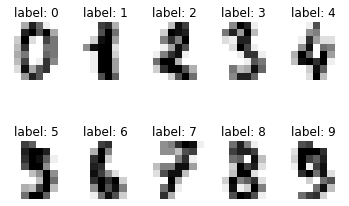

In [11]:
num_plots = 10
fig, axes = plt.subplots(2, 5)
for i in range(num_plots) :
    ax = axes[i // 5][i % 5]
    ax.set_axis_off()
    ax.imshow(np.resize(X[i], (8,8)), 
              cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('label: %i' % y[i])

Next we can histogram the pixel values for different classes for one select pixel and explore if some my be more dinstictive than others. 

In [12]:
def hist_pixs_by_class(X, pix_i, pix_j) :
    num_plots = 10
    Xim = X.reshape(X.shape[0],8,8)
    pix_vals = Xim[:,pix_i,pix_j]
    fig, axes = plt.subplots(5, 2)
    fig.set_size_inches(9,12)
    pix_bins = [i for i in range(17)]
 
    for i in range(num_plots) :
        ax = axes[i // 2][i % 2]
        ax.set_title(f'Digit {i}: Pixel ({pix_i},{pix_j})')
        ax.hist(pix_vals[y == i],bins=pix_bins,
                rwidth=0.75,color='orange')
        ax.set_ylim(0,200)
        ax.set_xlabel("Pixel Intensity Value")
        ax.set_ylabel("Count")
        ax.set_xticks(pix_bins)
    plt.subplots_adjust(hspace=0.75)
    

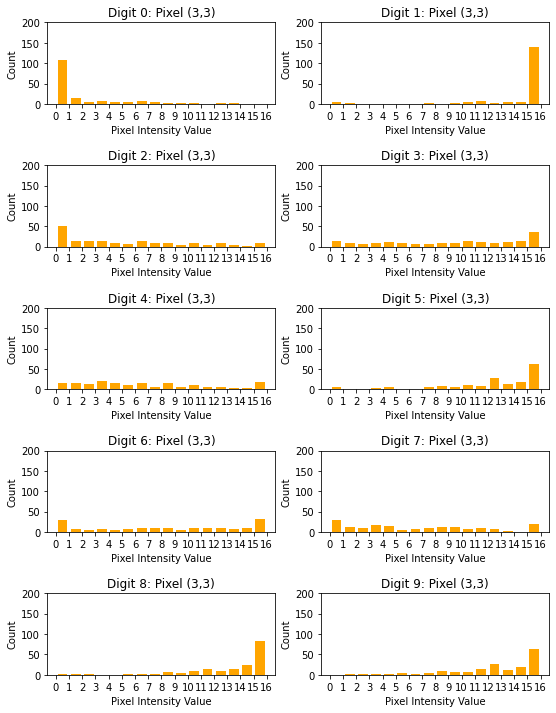

In [13]:
hist_pixs_by_class(X, 3,3)

Later in the course we will see ways of visualizing high dimensional data in two or three dimensions, which will help us get a better picture of what's going on overall.

Before using the nearest neighbor classifier we need to split the data into training and test sets:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.30, shuffle=True, random_state=42)

print(X_train.shape, X_test.shape)

(1257, 64) (540, 64)


Now we are ready to classify our data:

In [14]:
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

How accurate is our classifier?

In [15]:
acc = np.sum(y_pred == y_test)/len(y_test)
print(f'The accuracy is {acc:.3f}')


The accuracy is 0.983


Next, let's plot training examples and their closest test examples:

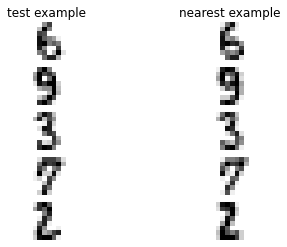

In [16]:
num_plots = 5
fig, axes = plt.subplots(5, 2);
for i in range(num_plots) :
    ax_test = axes[i][0]
    ax_nearest = axes[i][1]
    ax_test.set_axis_off()
    ax_nearest.set_axis_off()
    ax_test.imshow(np.resize(X_test[i], (8,8)), 
              cmap=plt.cm.gray_r, interpolation='nearest')
    nearest = X_train[nn.get_nearest(X_test[i])]
    ax_nearest.imshow(np.resize(nearest, (8,8)), 
              cmap=plt.cm.gray_r, interpolation='nearest')
    if (i==0):
        ax_test.set_title('test example')
        ax_nearest.set_title('nearest example')

## About Training / Test Splits

We have not really talked yet, surprisingly, much about the most important issue in machine learning - **generalization**.

To meaningfully discuss generalization to new samples there are a couple of nomenclature hurdles we need to overcome.  With this in mind, let us discussed the following terms:

* Data Set (Domain)
* Training Set
* Test Set
* Validation Set
* Random Sampling
* IID Sampling
* Biased Sampling
* Overfitting

Last but not least, perhaps the most important and hardest issue is simply this - when confronting a real world problem where the goal is to make predictions (use machine learning), what evidence is there for the underlying assumption that the past (training) looks like the future (test)?  

Also, and this will take us back to our digit classification task, anyone up-to-speed on the foundation and practice of Machine Learning must take seriously this question:

>  How easy is our problem? 

And please do not be fooled by the apparent simplicity of the above question.  Being a bit personal about research, I find myself repeatedly drawn back to this question. It is a truly important question and there are as many ways to think through the implications of your data as there are clever data scientists. That said, you've just seen one of the more fruitful techniques. When confronting a new data set a great question is:

> How well does a nearest neighbor classifier work on my data?

Further, how many samples must be memorized before performance acheives a reasonable level. Below we will pursue specifically this question for the digits data set. 

You may also find the following resource useful:  

* [Google Developers Lecture on Generalization](https://developers.google.com/machine-learning/crash-course/generalization/video-lecture)

### Experiment with Different Train / Test Splits

This is a good time to start talking more about how machine learning approaches split data into training and testing sets.  There are of course some ground rules.  The test samples must never be the same - or even overlap - the training samples. Beyond that, matters get more complicated depending upon your goal.  As we progress, terms such as `k-fold cross validation` will come into play.  But, I want for the moment to step away from such complexity and start simpler.  

So, we begin asking what it means to break our data into disjoint chunks, splits. Further, we would like to get roughly the same number of examples of each class in each split.  Here is on way to accomplish that task on the digits data set. And as you can tell by the naming, the object `StratifiedKFold` we are using will turn up later in the context of `k-fold` cross validation.


In [17]:
splits_k = 5
random_seed = 43
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=splits_k,
                      random_state=random_seed,shuffle=True)
skf.get_n_splits(X, y)
skf



StratifiedKFold(n_splits=5, random_state=43, shuffle=True)

In [18]:
skf.split(X,y)

<generator object _BaseKFold.split at 0x7fc621146650>

What can we do with this new object?  Well, the simplest thing we can do is take advantage of the fact it created $k$ disjoint splits of our data `X` balancing the sampling so as to keep - as close as possible - an equal number of each class in each split. 

In [19]:
splits = []
for train_index, test_index in skf.split(X, y):
    splits.append(test_index)
split_sizes = np.array([splits[i].shape[0] for i in range(splits_k)])
split_sizes

array([360, 360, 359, 359, 359])

### Test if Splits are Balanced and Complete

There are two things we care about.  Are the class labels as evenly distributed as can be hoped for in each split. We can test this with a histogram of labels. Does the union of the splits contain are compete data set `X`?  Testing this is more interesting (see below)

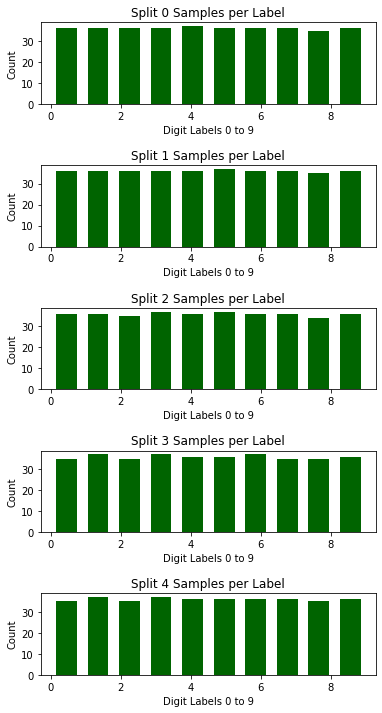

In [20]:
fig, axes = plt.subplots(len(splits), 1);
fig.set_size_inches(6,12)
plt.subplots_adjust(hspace=0.75)
for i in range(len(splits)) :
    ax = axes[i]
    ax.set_title(f'Split {i} Samples per Label')
    ax.set_xlabel('Digit Labels 0 to 9')
    ax.set_ylabel('Count')
    ax.hist(y[splits[i]],rwidth=0.66,color='darkgreen')

Note how the next four lines of code are used to confirm that all indices in `X` are present in the union of the splits. 

In [21]:
foo = np.hstack(splits)
bar = np.sort(foo)
inc = [(bar[i+1] - bar[i]) - 1 for i in range(len(bar)-1)]
np.sum(inc)

0

### Split Zero is Training the Rest Testing

For our nearest neighbor classifier which does not really seem to need large amounts of training data and easy way to test is to use the first split (split zero) as the training data and the rest as the test data.

In [22]:
X_train = X[splits[0]]
y_train = y[splits[0]]
X_test = X[np.hstack(splits[1:])]
y_test = y[np.hstack(splits[1:])]
(X_train.shape, X_test.shape)

((360, 64), (1437, 64))

In [23]:
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
acc = np.sum(y_pred == y_test)/len(y_test)
print(f'Accuracy is {acc:.3f}')

Accuracy is 0.964


## The decision boundary 

Another way to think about the nearest neighbor classifier is to consider the question of the shape of its decision boundary.  While the decision boundary of classifiers such as the perceptron are linear, the nearest neighbor classifier is more flexible as we see next.

First, here's a function for plotting the decision boundary of a classifier:

In [24]:
from matplotlib.colors import ListedColormap

def plot_boundary(classifier, X, y, axes = None) :
    """
    code based on:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """
    classifier.fit(X, y)
    # color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # create a two dimensional grid of points
    h = .02  # grid size
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the predictions on the grid
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    

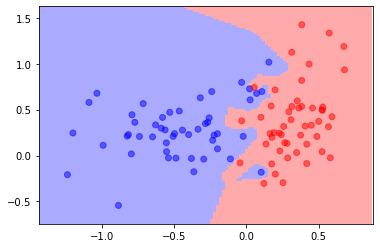

In [25]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=0.35, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(1)

plot_boundary(classifier, X, y)

### To further highlight the way the nearest neighbor classifier works, here's random data in two dimensions:

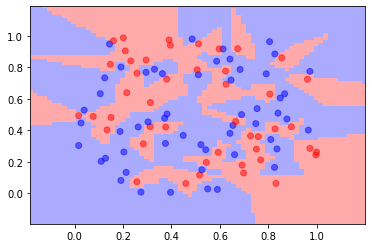

In [26]:
from numpy.random import default_rng
rng = default_rng(1)

X_random = rng.random(size=(100, 2))
y_random = rng.integers(0, 2, len(X_random))
classifier = KNeighborsClassifier(1)
plot_boundary(classifier, X_random, y_random)

### Voronoi diagrams

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Euclidean_Voronoi_diagram.svg" width="250">

Turns out that the decision boundary of a nearest neighbor classifier is related to the concept of a *Voronoi diagram*.

Given a collection of points $\{\mathbf{x}_1,\ldots,\mathbf{x}_N\}$,
the Voronoi cell associated with point $\mathbf{x}_i$ is the set of points that are closer to $\mathbf{x}_i$ than every other point in the collection.

For nearest neighbor classification we obtain the decision boundary by merging adjacent Voronoi cells that have the same label associated with them.